In [ ]:
%pip install gspread

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install --upgrade google-api-python-client

Note: you may need to restart the kernel to use updated packages.


In [14]:
%pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install collection

Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [17]:
%pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [18]:
import os
from datetime import datetime

In [21]:
folder_path = 'graphs/'
os.makedirs(folder_path, exist_ok=True)

In [22]:
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
graph_filename = os.path.join(folder_path, f'bar_graph_{current_datetime}.png')

In [23]:
from google.oauth2 import service_account
from googleapiclient.discovery import build

SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
KEY = 'key.json'
SPREADSHEET_ID = '1v6jPy3qsobEraNWQ5j9QxkpWjxM6v8Xv8iz5EC-kPMI'
SHEET_NAME = 'News'

creds = service_account.Credentials.from_service_account_file(
    KEY, scopes=SCOPES)
service = build('sheets', 'v4', credentials=creds)
sheet = service.spreadsheets()

ValueError: ('Could not deserialize key data. The data may be in an incorrect format, it may be encrypted with an unsupported algorithm, or it may be an unsupported key type (e.g. EC curves with explicit parameters).', [<OpenSSLError(code=503841036, lib=60, reason=524556, reason_text=unsupported)>])

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
result = sheet.values().get(spreadsheetId=SPREADSHEET_ID, range=SHEET_NAME).execute()
values = result.get('values', [])

In [ ]:
headers = values[0]
data = values[1:]

In [ ]:
categories = [row[7] for row in data if len(row) > 7]

In [ ]:
category_counts = Counter(categories)

Excluding "Other", we want to know the most tendency category from the news.

In [ ]:
if 'Others' in category_counts:
    del category_counts['Others']

In [ ]:
labels, counts = zip(*category_counts.items())

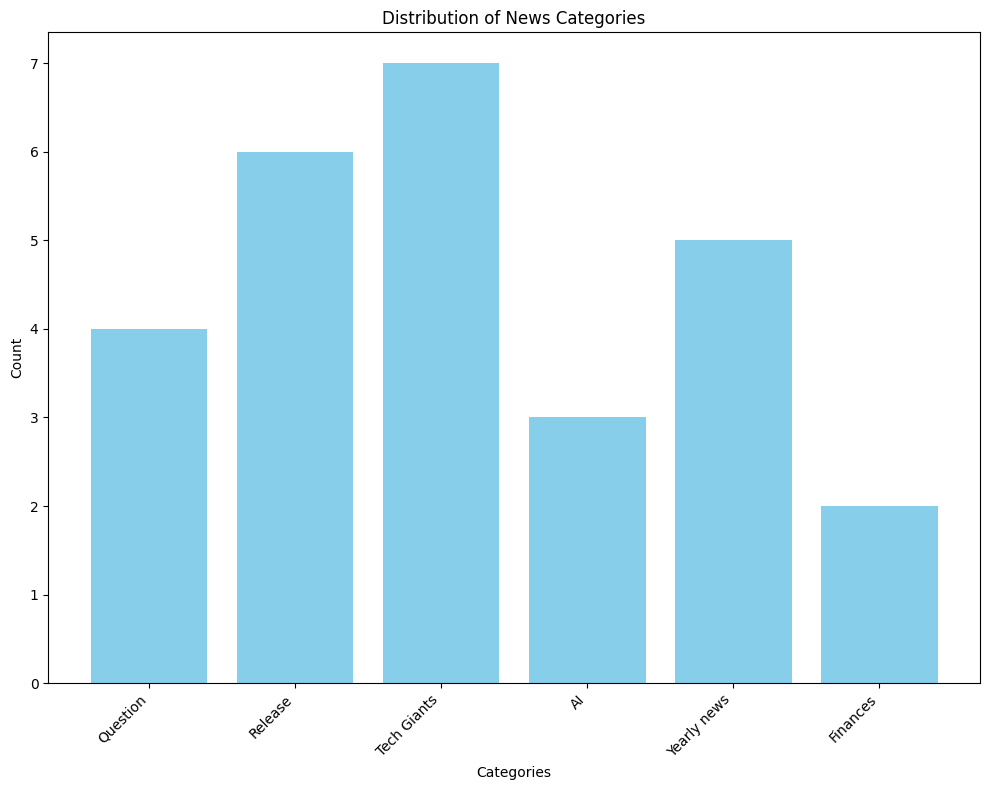

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of News Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [ ]:
plt.savefig(graph_filename)

In [ ]:
plt.close()